# Recurrent Neural Networks

## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import logging

tf.get_logger().setLevel(logging.ERROR)

## Import IMDB Dataset

In [2]:
VOCAB_SIZE = 10000
MAX_LEN = 256

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=VOCAB_SIZE)
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=MAX_LEN)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=MAX_LEN)

In [3]:
print(f'X_train: {X_train.shape}')
print(f'Y_train: {y_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'Y_test : {y_test.shape}')

X_train: (25000, 256)
Y_train: (25000,)
X_test : (25000, 256)
Y_test : (25000,)


## RNN Model

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((MAX_LEN,)),
    tf.keras.layers.Embedding(VOCAB_SIZE, 32),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1, activation='sigmoid')
], name = 'RNN')

model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

model.summary()

Model: "RNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 256, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 322,113 (1.23 MB)

 Trainable params: 322,113 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
BATCH_SIZE = 128
EPOCHS = 10

history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - accuracy: 0.5625 - loss: 0.6715
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.8322 - loss: 0.3871
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - accuracy: 0.9019 - loss: 0.2516
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - accuracy: 0.9476 - loss: 0.1565
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - accuracy: 0.9662 - loss: 0.1006
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.9799 - loss: 0.0671
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - accuracy: 0.9906 - loss: 0.0366
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - accuracy: 0.9967 - loss: 0.0172
Epoch 9/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - accuracy: 0.9984 - loss: 0.0103
Epoch 10/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.9989 - loss: 0.0083


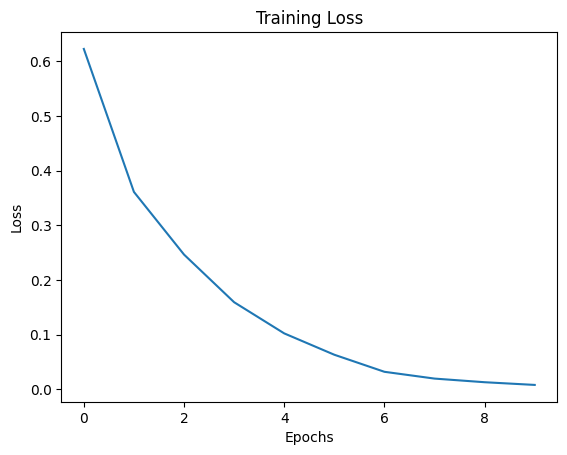

In [6]:
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [7]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Performance on test set:')
print(f'Loss: {test_loss}\nAccuracy: {test_accuracy}')

Performance on test set:
Loss: 0.7752407789230347
Accuracy: 0.8401600122451782
